In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [15]:
# Generate synthetic dataset (5 classes)

def generate_dataset(n=1000):
    X = np.random.randn(n, 2) * 2
    Y = np.zeros((n,), dtype=int)

    # 5 class regions
    Y[(X[:,0] > 1) & (X[:,1] > 0.5)] = 1
    Y[(X[:,0] < -1) & (X[:,1] > 0)] = 2
    Y[(X[:,0] > 0) & (X[:,1] < -1)] = 3
    Y[(X[:,0] < 0) & (X[:,1] < -0.5)] = 4

    return X, Y

X, Y_raw = generate_dataset(1500)

Y = np.eye(5)[Y_raw]

print(X)
print(Y)


[[ 3.52810469  0.80031442]
 [ 1.95747597  4.4817864 ]
 [ 3.73511598 -1.95455576]
 ...
 [ 0.64006386  4.15835333]
 [-1.81493196 -0.38480842]
 [-2.42503149 -0.16119703]]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [16]:
#split
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]

# 75% train, 25% test
split = int(0.75 * X.shape[0])

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]


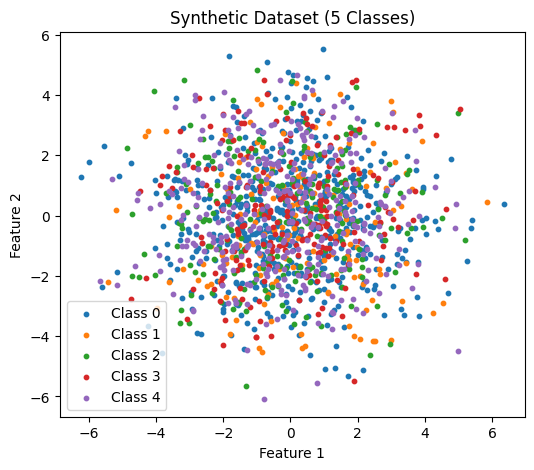

In [17]:
# Visualize dataset
plt.figure(figsize=(6,5))
for i in range(5):
    plt.scatter(X[Y_raw==i,0], X[Y_raw==i,1], s=10, label=f"Class {i}")
plt.title("Synthetic Dataset (5 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Epoch: 0 Loss: 2.1190142815140454
Epoch: 200 Loss: 1.469221227945042
Epoch: 400 Loss: 1.3475709814227508
Epoch: 600 Loss: 1.281265135508879
Epoch: 800 Loss: 1.2268771080594705
Epoch: 1000 Loss: 1.1811833962058276
Epoch: 1200 Loss: 1.1434882065431764
Epoch: 1400 Loss: 1.11248021995542
Epoch: 1600 Loss: 1.0865226434766972
Epoch: 1800 Loss: 1.064075816328913


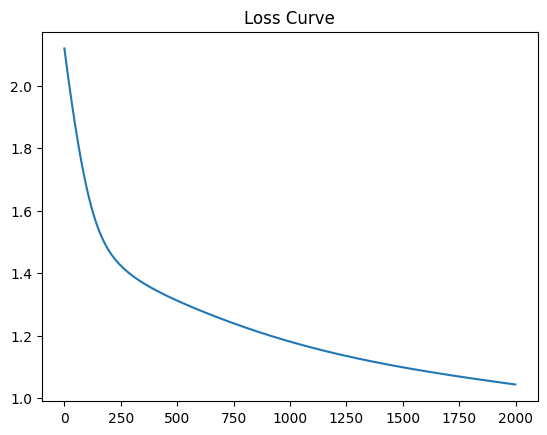

In [18]:
# Neural Network

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1 = 10
        hiddenLayer2 = 10
        hiddenLayer3 = 10
        outputNeurons = 5

        self.learning_rate = 0.01

        #Weight Init
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1)
        self.W_H2 = np.random.randn(hiddenLayer1, hiddenLayer2)
        self.W_H3 = np.random.randn(hiddenLayer2, hiddenLayer3)
        self.W_O  = np.random.randn(hiddenLayer3, outputNeurons)

    # Sigmoid (hidden layers)
    def sigmoid(self, x, der=False):
        s = 1/(1+np.exp(-x))
        if der:
            return s*(1-s)
        return s


# Softmax (for output layer)
    def softmax(self, x):
        e = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e / np.sum(e, axis=1, keepdims=True)


    # Feedforward

    def feedForward(self, X):

        self.Z1 = np.dot(X, self.W_H1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W_H2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W_H3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W_O)
        self.pred = self.softmax(self.Z4)

        return self.pred


    #Backpropagation
    def backPropagation(self, X, Y, pred):

        m = X.shape[0]


        output_error = (pred - Y) / m
        output_delta = output_error


        hidden3_error = output_delta.dot(self.W_O.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.A3, der=True)


        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.A2, der=True)


        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.A1, der=True)



        self.W_O  -= self.learning_rate * self.A3.T.dot(output_delta)
        self.W_H3 -= self.learning_rate * self.A2.T.dot(hidden3_delta)
        self.W_H2 -= self.learning_rate * self.A1.T.dot(hidden2_delta)
        self.W_H1 -= self.learning_rate * X.T.dot(hidden1_delta)


    # Train function
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


# Train the network

NN = NeuralNetwork()

errors = []
epochs = 2000

for i in range(epochs):
    NN.train(X_train, Y_train)
    pred = NN.feedForward(X_train)

    loss = -np.mean(np.sum(Y_train * np.log(pred + 1e-8), axis=1))
    errors.append(loss)

    if i % 200 == 0:
        print("Epoch:", i, "Loss:", loss)

plt.plot(errors)
plt.title("Loss Curve")
plt.show()



OBSERVATION:
Test Accuracy: 0.5493333333333333

Class 0:
 Precision: 0.57435897432952
 Recall: 0.8235294117041522
 F1-Score: 0.6767371552388167

Class 1:
 Precision: 0.0
 Recall: 0.0
 F1-Score: 0.0

Class 2:
 Precision: 0.0
 Recall: 0.0
 F1-Score: 0.0

Class 3:
 Precision: 0.9999999975
 Recall: 0.07272727271404958
 F1-Score: 0.13559321902901464

Class 4:
 Precision: 0.5113636363345816
 Recall: 0.999999999888889
 F1-Score: 0.6766917247950704


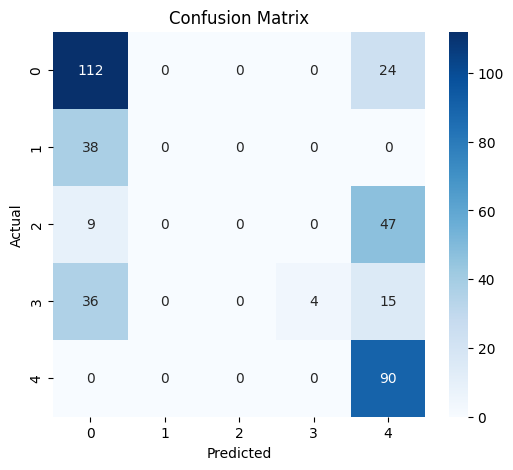

In [20]:
# Testing
pred_test = NN.feedForward(X_test)
y_pred = np.argmax(pred_test, axis=1)
y_true = np.argmax(Y_test, axis=1)

accuracy = np.mean(y_pred == y_true)
print("OBSERVATION:")
print("Test Accuracy:", accuracy)


num_classes = 5

precision = []
recall = []
f1 = []

for c in range(num_classes):
    TP = np.sum((y_pred == c) & (y_true == c))
    FP = np.sum((y_pred == c) & (y_true != c))
    FN = np.sum((y_pred != c) & (y_true == c))

    prec = TP / (TP + FP + 1e-8)
    rec  = TP / (TP + FN + 1e-8)
    f1_c = 2 * prec * rec / (prec + rec + 1e-8)

    precision.append(prec)
    recall.append(rec)
    f1.append(f1_c)

    print(f"\nClass {c}:")
    print(" Precision:", prec)
    print(" Recall:", rec)
    print(" F1-Score:", f1_c)


# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



**Modifications Made to Implement Multi-Class Classification:**

The original neural network code was designed for binary classification. To extend it to multi-class classification (5 classes), the following modifications were required:

a. One-Hot Encoding of Labels

Instead of representing class labels as a single integer, each label is converted to a one-hot vector of size 5:

In [ ]:
Y = np.eye(5)[Y_raw]

This is required because the output layer uses softmax, which produces a probability distribution over all 5 classes.

b. Softmax Activation for Output Layer

For multi-class classification, the sigmoid activation is not appropriate.
Softmax ensures all outputs sum to 1:

In [ ]:
def softmax(self, x):
    e = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)

c. Cross-Entropy Loss Function

The multi-class cross-entropy loss was used:

In [ ]:
loss = -np.mean(np.sum(Y_train * np.log(pred + 1e-8), axis=1))

Softmax + Cross-Entropy produces stable gradients for multi-class classification.

d. Weight Updates Modified for 5-Class Output

Final weight matrix:

In [ ]:
self.W_O  = np.random.randn(hiddenLayer3, 5)

**Challenges Faced & How They Were Addressed:**

a. Division by Zero in Metrics

Precision and recall formulas require denominator ≠ 0.
To avoid runtime errors, a small constant 1e-8 was added:

In [ ]:
prec = TP / (TP + FP + 1e-8)

b. Ensuring Correct Gradient Flow

With 3 hidden layers, a mistake in backprop order causes network collapse.
To fix this:

- Each layer propagates delta backward correctly
- Sigmoid derivative used only for hidden layers
- Softmax derivative simplified at output

**Lessons Learned:**

- How softmax works for multi-class classification
- How gradients propagate through multiple hidden layers
- The importance of numerical stability (adding 1e-8, subtracting max in softmax)
- How multilayer neural networks learn non-linear class boundaries


**Potential Improvements:**  
- Replacing sigmoid with ReLU in hidden layers to mitigate vanishing gradients.  
- Increasing the number of neurons or layers to capture complex decision boundaries.  
- Using the Adam optimizer for faster and more stable convergence.  
- Balancing the dataset or enhance class separability to improve learning.  